In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Show plot
img = cv2.imread('wave.jpg',0)
edges = cv2.Canny(img,100,200)

# http://stackoverflow.com/a/29799815/1698058
# Get index of matching value.
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

bounds = [750, 1500]
# Now the points we want are the lowest-index 255 in each row
window = edges[bounds[1]:bounds[0]:-1].transpose()

xy = []
for i in range(len(window)):
    col = window[i]
    j = find_first(255, col)
    if j != -1:
        xy.extend((i, j))
# Reshape into [[x1, y1],...]
data = np.array(xy).reshape((-1, 2))
# Translate points back to original positions.
data[:, 1] = bounds[1] - data[:, 1]

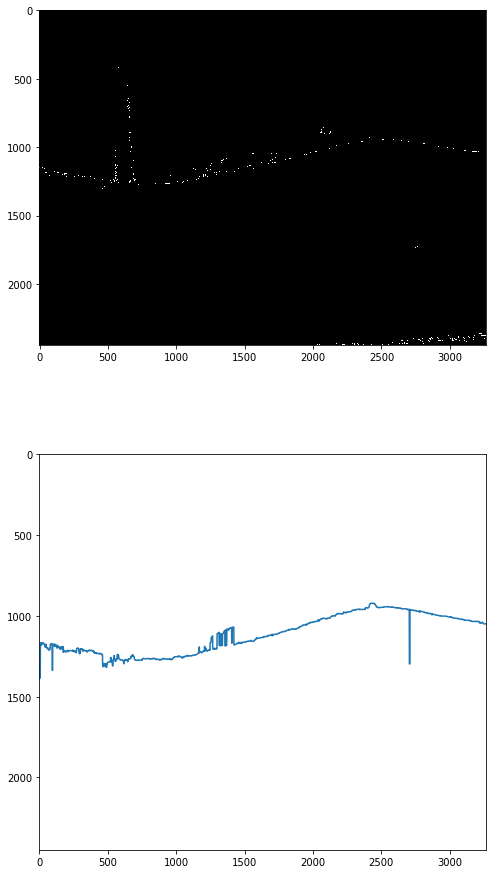

In [48]:
plt.figure(1, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(edges,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, edges.shape[1], edges.shape[0], 0])
ax2.plot(data[:,1])
plt.show()

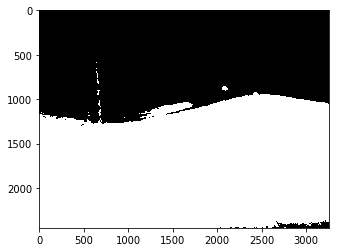

In [49]:
path='wave.jpg'
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [50]:
xdata = data[:,0]
ydata = data[:,1]

z = np.polyfit(xdata, ydata, 5)
f = np.poly1d(z)

In [51]:
print(img.shape)
print(data[:,0])
print(data[:,1])
print(data[:,0].shape)
print(data[:,1].shape)

(2448, 3264, 3)
[   0    1    2 ... 3261 3262 3263]
[1387 1388 1387 ... 1049 1049 1049]
(3263,)
(3263,)


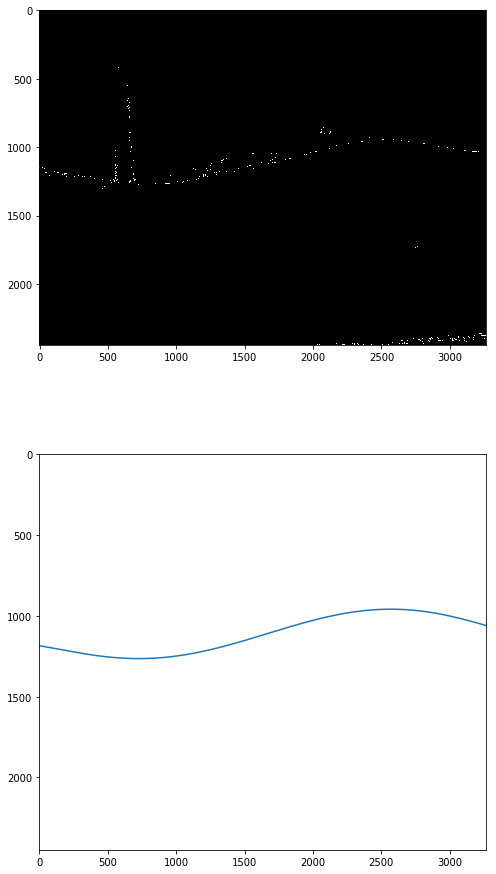

In [52]:
t = np.arange(0, edges.shape[1], 1)
plt.figure(2, figsize=(8, 16))
ax1 = plt.subplot(211)
ax1.imshow(edges,cmap = 'gray')
ax2 = plt.subplot(212)
ax2.axis([0, edges.shape[1], edges.shape[0], 0])
ax2.plot(t, f(t))
plt.show()